In [9]:
import ROOT as r

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [-inf, inf] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:ObjectHandling -- RooWorkspace::import() importing dataset model2Data
[#1] INFO:ObjectHandling -- RooWorkSpace::import() changing name of dataset from  model2Data to data

RooWorkspace()  contents

variables
---------
(bkgfrac,l,l1,mu,mu1,sigma,sigma1,x)

p.d.f.s
-------
RooGaussian::gauss[ x=x mean=mu sigma=sigma ] = 1
RooGaussian::gauss1[ x=x mean=mu1 sigma=sigma1 ] = 1
RooAddPdf::model2[ bkgfrac * shape + [%] * gauss ] = 0.230899/1
RooExponential::shape[ x=x c=l ] = 0.22313
RooExponential::shape1[ x=x c=l1 ] = 0.22313

datasets
--------
RooDataSet::data(x)

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (gauss)
[#1] INFO:Minimization --  The 

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       2033.780605 Edm =       1.061242993 NCalls =      9
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2033.780605
  Edm           : 1.061242993
  Internal parameters:	[      1.287002218   -0.06003605845]	
  Internal gradient  :	[      1.192726216     -532.4960724]	
  Internal covariance matrix:
[[    0.070483917              0]
 [              0  1.4617075e-05]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       2033.780605 Edm =       1.061242993 NCalls =      9
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       2032.839129 Edm =       0.126259938 NCalls =     15
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       2032.726405 Edm =     0.00131458889 NCalls =     20
Info in <Minuit2>: VariableMetr

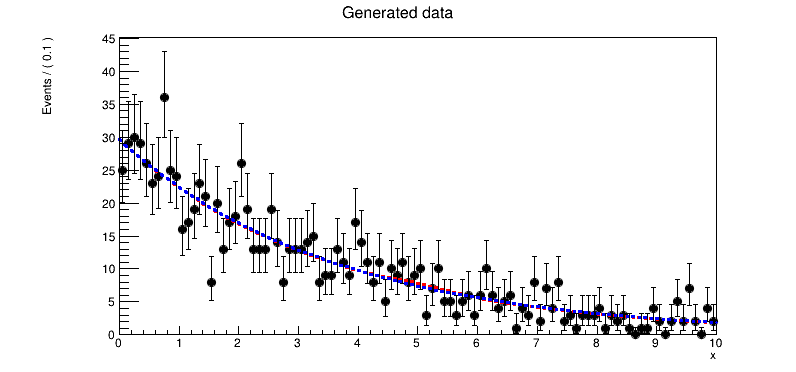

In [27]:
wspace = r.RooWorkspace()                                                                                       
wspace.factory("Gaussian::gauss(x[0,10],mu[5],sigma[.5])") ## Defines a Gaussian (normal) distribution named gauss.
wspace.factory("Exponential::shape(x,l[-.3,-5,5])")  ## Defines an exponential distribution named shape.
#

wspace.factory("SUM::model2(bkgfrac[.99,0.5,1.0]*shape,gauss)"); 
#
wspace.factory("Gaussian::gauss1(x[0,10],mu1[5,0,10],sigma1[.5,0.1,10])")                                       
wspace.factory("Exponential::shape1(x,l1[-.3,-5,5])")   
    #wspace.factory("SUM::model(bkgfrac1[1.,0.99,1.]*shape1,gauss1)");                                                   
#wspace.defineSet("poi", "mu")                                                                                  
#wspace.defineSet("obs", "x")  

data = wspace.pdf("model2").generate(r.RooArgSet(wspace.var("x")), 1000)                                        
    #getattr(wspace, 'import')(data, r.RooFit.Rename("data"))
                                                      
    #data_null = wspace.pdf("model").generate(r.RooArgSet(wspace.var("x")), 1000)  
#data_null = wspace.pdf("shape1").generate(r.RooArgSet(wspace.var("x")), 10000)
getattr(wspace, 'import')(data, r.RooFit.Rename("data")) 

x = wspace.var("x")
#x1 = wspace.var("x1")
model_data = wspace.pdf("model2")
bkgonly_model = wspace.pdf("shape1")

gauss = wspace.pdf("gauss")                                                                                     
shape = wspace.pdf("shape")                                                                                     
                                                                                                                
k = r.RooKeysPdf("k", "k", x, data, r.RooKeysPdf.NoMirror, 0.2)                                                 
    #getattr(wspace, 'import')(k, r.RooFit.RenameAllNodes("workspace"))                                              
                                                                                                        
wspace.Print()  
xframe2 = x.frame(r.RooFit.Title("Generated data"))  
#result = shape.fitTo(data_null,r.RooFit.Save())   
result_null = model_data.fitTo(data,r.RooFit.Save())
data.plotOn(xframe2)
model_data.plotOn(xframe2,r.RooFit.LineColor(r.kRed),r.RooFit.LineStyle(r.kDashed))
result = bkgonly_model.fitTo(data,r.RooFit.Save())
    #data.plotOn(xframe2)
    #shape.plotOn(xframe2)
bkgonly_model.plotOn(xframe2,r.RooFit.LineColor(r.kBlue),r.RooFit.LineStyle(r.kDashed))
c2 = r.TCanvas("Exercise02","Exercise02",800,400) 
r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;  
c2.Draw()  
likelihood = result.minNll()
likelihood_null = result_null.minNll()
tμ = 2*(likelihood - likelihood_null)

In [28]:
tμ

0.245202464423528

In [19]:
infile = r.TFile.Open("tvaldist.root")
if not infile or infile.IsZombie():
    print("Error: Cannot open file 'tvaldist.root'")
else:
    print("File 'tvaldist.root' opened successfully.")
    
hist = infile.Get("histogram")

canvas = r.TCanvas("canvas", "Histogram with Line", 800, 600)
hist.Draw()

line = r.TLine(tμ, 0, tμ, hist.GetMaximum())
line.SetLineColor(r.kRed)  # Set line color (optional)
line.SetLineWidth(2)  # Set line width (optional)
line.Draw("same")

# Update and save the canvas
canvas.Update()
canvas.SaveAs("histogram_with_line.png")
        

File 'tvaldist.root' opened successfully.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file histogram_with_line.png has been created


In [16]:
# Calculate the total area of the histogram
total_area = hist.Integral()

# Initialize variables for area above 'a' and total bins count
area_above_line = 0.0
total_bins = hist.GetNbinsX()

# Loop over histogram bins and sum up areas above 'a'
for bin_idx in range(1, total_bins + 1):
    bin_center = hist.GetBinCenter(bin_idx)
    bin_content = hist.GetBinContent(bin_idx)
    
    if bin_center > tμ:
        area_above_line += bin_content

# Calculate the ratio of area above 'a' to total area
if total_area > 0:
    ratio_area_above_line = area_above_line / total_area
else:
    ratio_area_above_line = 0.0  # Avoid division by zero

print(f"Total area of histogram: {total_area}")
print(f"Area above line at 'line={tμ}': {area_above_line}")
print(f"Ratio of area above 'tμ' to total area: {ratio_area_above_line}")

# Close the ROOT file

Total area of histogram: 999.0
Area above line at 'line=70.14601429658114': 0.0
Ratio of area above 'tμ' to total area: 0.0
